<a href="https://colab.research.google.com/github/Itsuki966/id_workshop/blob/main/id_workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 25.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=2562562b37e87f0b958154f741e861d12c9863467a136654c443f476a8ace660
  Stored in directory: /root/.cache/pip/wheels/da/a1/71/b8faeb93276fed10edffcca20746f1ef6f8d9e071eee8425fc
Successfully built japanize-matplotlib


In [ ]:
# 必要なライブラリのインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import openpyxl
import japanize_matplotlib
from sklearn.cluster import KMeans

# データを読み込む

In [ ]:
# データを読み込むための関数
def load_data(year):
  data = pd.read_excel("city_data.xlsx", sheet_name = str(year), index_col=0)
  return data

In [ ]:
data_2000 = load_data(2000)
data_2005 = load_data(2005)
data_2010 = load_data(2010)
data_2015 = load_data(2015)
data_list = [data_2000, data_2005, data_2010, data_2015]

# データの前処理

In [ ]:
# 欠損値を削除する関数
def preprocessing(data):
  data.dropna(inplace=True)
  data.replace("-", 0, inplace=True)
  data.drop(["year", "code"], axis=1, inplace=True)

In [ ]:
for d in data_list:
  preprocessing(d)

In [ ]:
# 全てのデータを結合 (教師あり学習で利用するデータを作成)
conbined_data = pd.concat(data_list)
conbined_data.reset_index(drop=True, inplace=True)

# 教師なし学習
市町村の分類をしてみよう


## 利用できるデータ項目
*   予算関係のデータ
> '歳出決算額', '社会福祉費', '老人福祉費', '児童福祉費', '農林水産業費', '商工費', '都市計画費', '住宅費', '財政力指標'

*   教育関連のデータ
> '教育費', '小学校費', '中学校費', '高校費', '幼稚園費', '小学校数', '小学校教員数', '中学校数', '中学校教員数', '高校数'
*   医療関連のデータ
> '介護老人福祉施設(65歳以上人口10万人当たり)', '一般病院数/10万人', '一般診療所数/10万人', '一般病院数/可住地面積', '一般診療所数/可住地面積'
*   人口データ
> '自市区町村で従業・通学している人口', '流出人口（県内他市区町村で従業・通学している人口）',
'流出人口（他県で従業・通学している人口）', '流入人口（県内他市区町村に常住している人口）', '流入人口（他県に常住している人口）', '若年層人口', '総人口', '昼夜間人口比率(%)'
*   産業構造データ
> '第一次産業就業者', '第二次産業就業者', '第三次産業就業者'











In [ ]:
# 分析対象データ（2000年のデータは"0"、2005年は"1"、2010年は"2"、2015年は"3"）
o_data = data_list[3]

# 利用するデータ項目を指定
cols = ['第三次産業就業者', '第一次産業就業者']

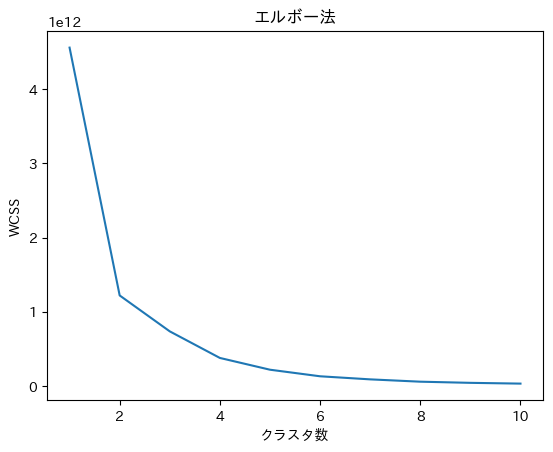

In [ ]:
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(o_data[cols])
  wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title("エルボー法")
plt.xlabel("クラスタ数")
plt.ylabel("WCSS")
plt.show()

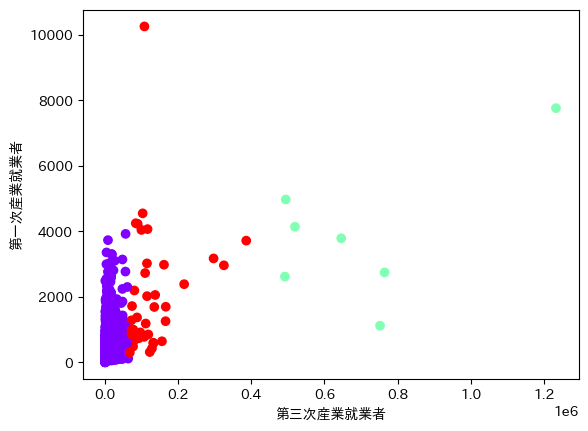

In [ ]:
cluster_num = 3
kmeans = KMeans(n_clusters=cluster_num, init='k-means++', max_iter=300, n_init=10, random_state=0)
result = kmeans.fit_predict(o_data[cols])

plt.scatter(o_data[cols[0]], o_data[cols[1]], c=result, cmap='rainbow')
plt.xlabel(cols[0])
plt.ylabel(cols[1])
plt.show()